# Analisis simple de la tendencia de infectados confirmados
### Este notebook tiene como objetivo implementar varios analisis relacionados con la pandemia de SARS-CoV-2 (Covid-19), que aparecio en el mundo a finales del 2019.

Importando las librerias de manejo de datos (pandas) la libreria para hacer graficos (matplotlib), la libreria cientifica (scipy) y la libreria de manejo numerico (numpy)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)
from scipy import optimize
import numpy as np

Luego definimos las funciones de fiteo exponencial

In [3]:
def test_func(x, a, b, c):
    return a + b* np.exp(c * x)

Importando la serie de tiempo con los casos confirmados (localmente por el momento). Estos datos son obtenidos de https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

In [4]:
#cases = pd.read_csv("time_series_covid19_confirmed_global.csv")
cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [5]:
data = cases.loc[cases['Country/Region'].isin(['Chile','Germany','Korea, South','Spain','Italy', 'Argentina', 'United Kingdom'])].T
ts_data = data.loc['1/22/20':'3/29/20'].rename(columns = {48: "Chile", 137: "Italia", 223: "Reino Unido", 143: "Corea del Sur", 201: "Espana", 120: "Alemania", 6: "Argentina"})

Aca arreglamos algunos errores que vienen en el las series de tiempo.

In [6]:
ts_data['Reino Unido'][50] = 590
ts_data['Reino Unido'][53] = 1391
ts_data['Chile'][57] = 342
ts_data['Espana'][50] = 3146
ts_data['Italia'][50] = 15113

Luego creamos los graficos y hacemos un fiteo exponencial de los datos en Chile al dia de hoy, y dos dias atras, para comparar la situacion actual con el escenario hace dos dias.

[0, 20, 0, 10000]

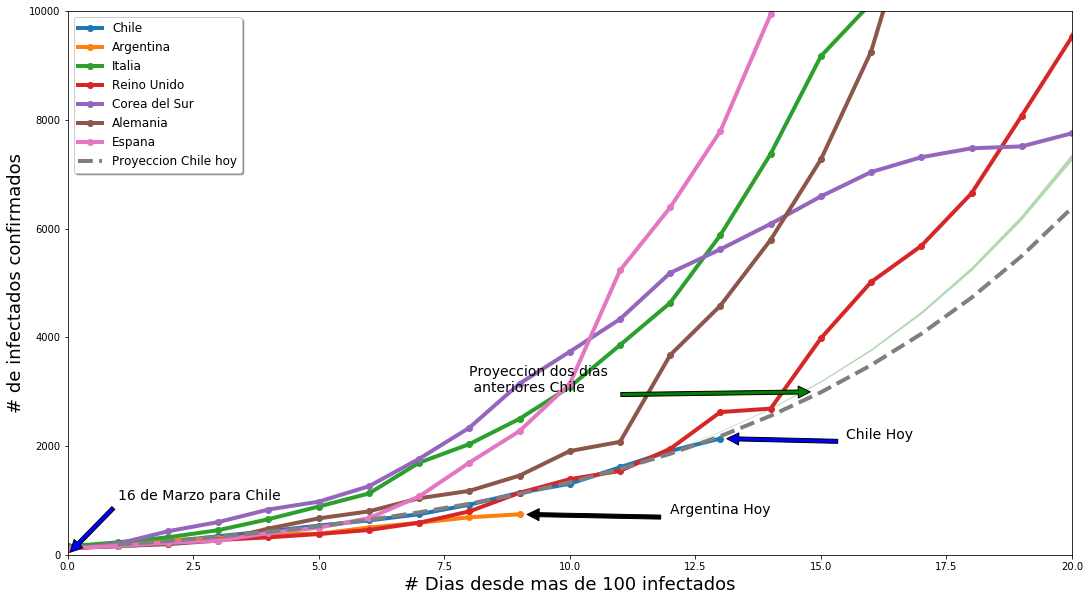

In [9]:
min_confirm = 100
countries = ['Chile','Argentina','Italia','Reino Unido','Corea del Sur','Alemania','Espana']
data_country = {}
fig, ax = plt.subplots()
for country in countries:
    data_country[country] = ts_data[country].loc[ts_data[country] > min_confirm]
    ax.plot([i for i in range(0, len(data_country[country]))], data_country[country], label = str(country), linewidth=4, marker = "." , markersize = 12)


plt.xlabel('# Dias desde mas de '+str(min_confirm)+' infectados', size =18)
plt.ylabel('# de infectados confirmados', size =18)

ax.annotate('Proyeccion dos dias\n anteriores Chile', xy=(15, 3000), xytext=(8, 3000),
            arrowprops=dict(facecolor='green', shrink=0.05),size = 14)

ax.annotate('16 de Marzo para Chile', xy=(0, 0), xytext=(1, 1000),
            arrowprops=dict(facecolor='blue', shrink=0.05), size = 14)

ax.annotate('Chile Hoy', xy=(len(data_country['Chile'])-1, data_country['Chile'][-1]), xytext=(len(data_country['Chile'])+1.5, data_country['Chile'][-1]),
            arrowprops=dict(facecolor='blue', shrink=0.05), size = 14)

ax.annotate('Argentina Hoy', xy=(len(data_country['Argentina'])-1, data_country['Argentina'][-1]), xytext=(len(data_country['Argentina'])+2, data_country['Argentina'][-1]),
            arrowprops=dict(facecolor='black', shrink=0.05), size = 14)

x  = np.array([i for i in range(1, len(data_country['Chile']))])
params_m2, pcov_m2 = optimize.curve_fit(test_func, x[:-2], np.array(data_country['Chile'][1:],dtype = float)[:-2],
                                               p0=[2, 2, 2])
params_m1, pcov_m1 = optimize.curve_fit(test_func, x[:-1], np.array(data_country['Chile'][1:],dtype = float)[:-1],
                                               p0=[2, 2, 2])
params, pcov       = optimize.curve_fit(test_func, x, np.array(data_country['Chile'][1:],dtype = float),
                                               p0=[2, 2, 2])

days = np.array([i for i in range(1,100)])
ax.plot(days, test_func(days, params[0], params[1], params[2]),
         label='Proyeccion Chile hoy', linewidth = 4, linestyle ='--')
legend = ax.legend(loc = 'upper left', shadow = True, fontsize='larger')

proj_m1 = test_func(days, params_m1[0], params_m1[1], params_m1[2])
proj_m2 = test_func(days, params_m2[0], params_m2[1], params_m2[2])

ax.fill_between(days , proj_m1, proj_m2,  facecolor='green', alpha=0.3)
ax.axis([0, 20, 0, 10000])

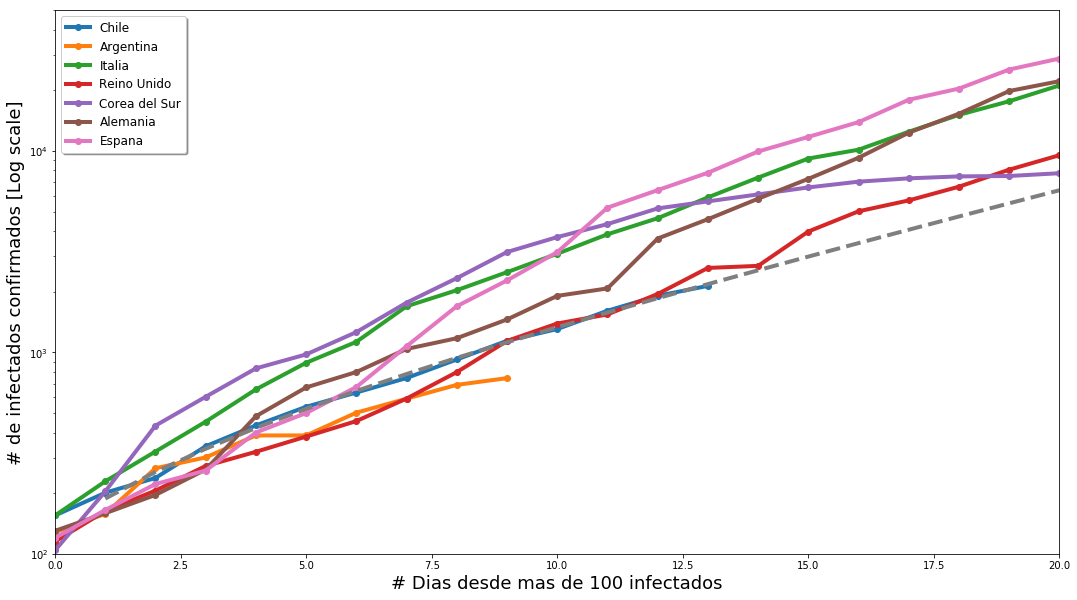

In [10]:
fig, ax = plt.subplots()
for country in countries:
    ax.plot([i for i in range(0, len(data_country[country]))], data_country[country], label = str(country), linewidth=4, marker = "." , markersize = 12)
    
plt.yscale('log')
legend = ax.legend(loc = 'upper left', shadow = True, fontsize='larger')
plt.xlabel('# Dias desde mas de '+str(min_confirm)+' infectados', size =18)
plt.ylabel('# de infectados confirmados [Log scale]', size =18)
ax.axis([0, 20, 100, 50000])
ax.plot(days, test_func(days, params[0], params[1], params[2]),
         label='Proyeccion Chile hoy', linewidth = 4, linestyle ='--')

[0, 35, 0, 10000]

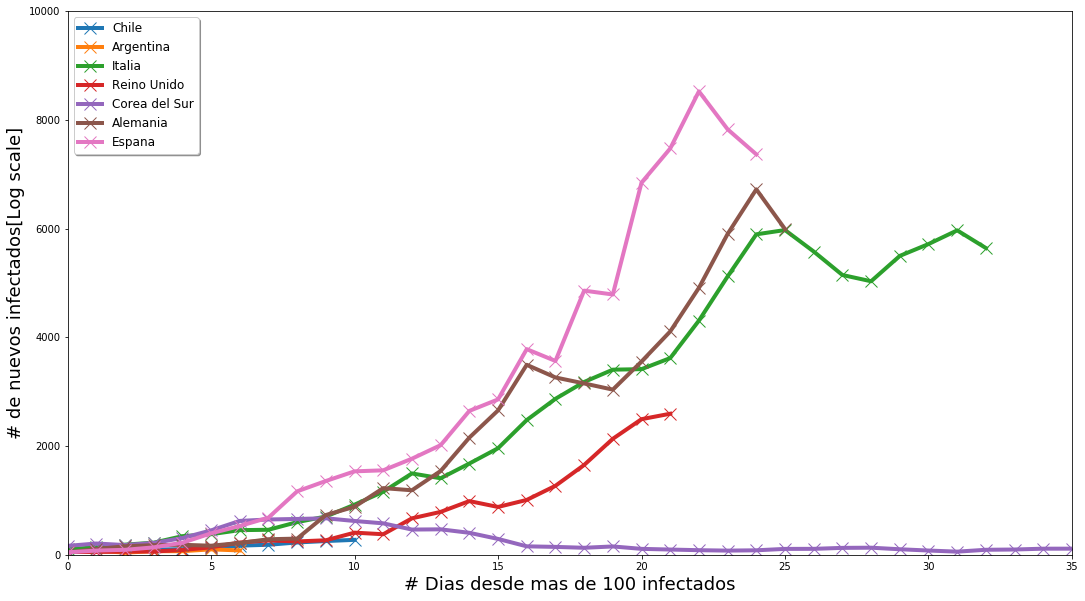

In [11]:
new_cases = {}
new_cases_smoothen = {}
fig, ax = plt.subplots()
for country in countries:
    new_cases[country] = [data_country[country][i]-data_country[country][i-1] for i in range(1,len(data_country[country]))]
    new_cases_smoothen[country] = [0.33*(new_cases[country][i+1]+ new_cases[country][i] + new_cases[country][i-1]) for i in range(1,len(new_cases[country])-1)]
    #ax.plot([i for i in range(0, len(new_cases[country]))], new_cases[country], label = str(country), linewidth=4, marker = "." , markersize = 12)
    ax.plot([i for i in range(0, len(new_cases_smoothen[country]))], new_cases_smoothen[country], label = str(country), linewidth=4, marker = "x" , markersize = 12)
    
#plt.yscale('log')
legend = ax.legend(loc = 'upper left', shadow = True, fontsize='larger')
plt.xlabel('# Dias desde mas de '+str(min_confirm)+' infectados', size =18)
plt.ylabel('# de nuevos infectados[Log scale]', size =18)
ax.axis([0, 35, 0, 10000])


## Modelo SIR para el caso chileno

In [12]:
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recov = recovered.loc[recovered['Country/Region'].isin(['Chile','Germany','Korea, South','Spain','Italy', 'Argentina', 'United Kingdom'])].T
ts_recov = recov.loc['1/22/20':'3/29/20'].rename(columns = {39: "Chile", 131: "Italia", 223: "Reino Unido", 137: "Corea del Sur", 199: "Espana", 112: "Alemania", 6: "Argentina"})

In [13]:
def linear_func(x, a):
    return a*x

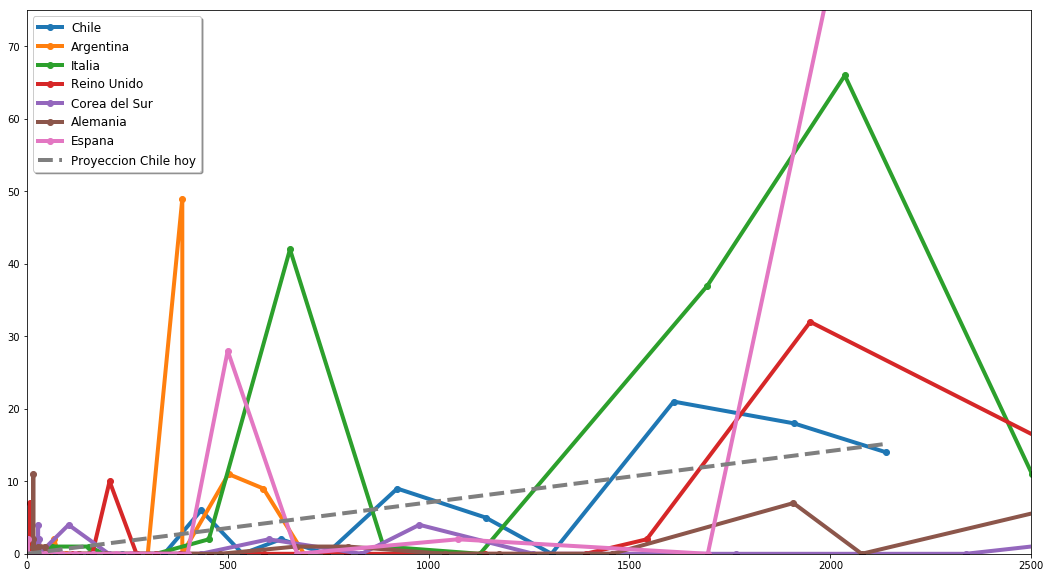

In [14]:
min_confirm = 100
countries = ['Chile','Argentina','Italia','Reino Unido','Corea del Sur','Alemania','Espana']
drecov_dt = {}
data_country_total = {}
fig, ax = plt.subplots()
for country in countries:
    drecov_dt[country] = [ts_recov[country][i]-ts_recov[country][i-1] for i in range(1,len(ts_recov[country]))]
    data_country_total[country] = ts_data[country]
    ax.plot(ts_data[country][1:], drecov_dt[country] , label = str(country), linewidth=4, marker = "." , markersize = 12)
ax.axis([0, 2500, 0, 75])
params_gamma, pcov_gamma = optimize.curve_fit(linear_func, np.array(ts_data['Chile'][1:],dtype = float), np.array(drecov_dt['Chile'],dtype = float),
                                               p0=[2])
ax.plot(ts_data['Chile'][1:], linear_func(ts_data['Chile'][1:], params_gamma[0]),
         label='Proyeccion Chile hoy', linewidth = 4, linestyle ='--')
legend = ax.legend(loc = 'upper left', shadow = True, fontsize='larger')

Text(0,0.5,'# de infectados confirmados modelo SIR')

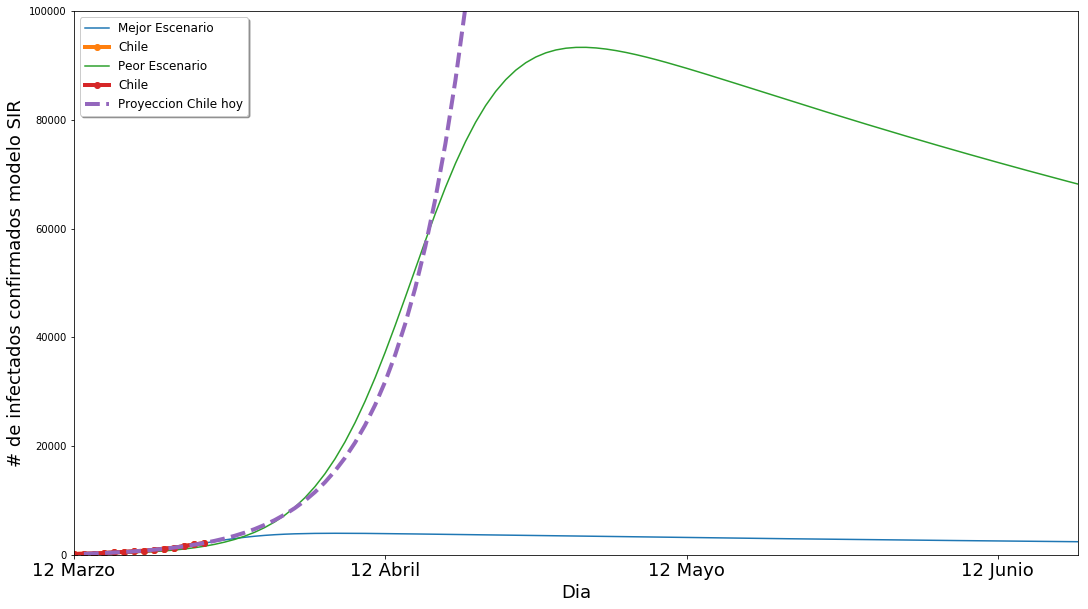

In [113]:
beta_s0 = params[2]+params_gamma[0]
gamma = params_gamma[0]
suceptible = []
infected = []
recovered = []
factor = 2500.
s = 2
i = 100./factor
r = 0

for day in range(0,200):
    s += -beta_s0*i*s
    i += +beta_s0*i*s-gamma*i
    r += gamma*i
    suceptible.append(factor*s)
    infected.append(factor*i)
    recovered.append(factor*r)
fig, ax = plt.subplots()
ax.plot(range(0,len(infected)),infected, label = str('Mejor Escenario'))
#ax.plot(range(0,len(recovered)),recovered)
#ax.plot(range(0,100),suceptible)
ax.plot([i for i in range(0, len(data_country['Chile']))], data_country['Chile'], label = str('Chile'), linewidth=4, marker = "." , markersize = 12)

suceptible = []
infected = []
recovered = []
factor = 80000.
s = 1.5
i = 100./factor
r = 0

for day in range(0,200):
    s += -beta_s0*i*s
    i += +beta_s0*i*s-gamma*i
    r += gamma*i
    suceptible.append(factor*s)
    infected.append(factor*i)
    recovered.append(factor*r)
ax.plot(range(0,len(infected)),infected, label = str('Peor Escenario'))
#ax.plot(range(0,len(recovered)),recovered)
#ax.plot(range(0,100),suceptible)
ax.plot([i for i in range(0, len(data_country['Chile']))], data_country['Chile'], label = str('Chile'), linewidth=4, marker = "." , markersize = 12)

days = np.array([i for i in range(1,100)])
ax.plot(days, test_func(days, params[0], params[1], params[2]),
         label='Proyeccion Chile hoy', linewidth = 4, linestyle ='--')

legend = ax.legend(loc = 'upper left', shadow = True, fontsize='larger')
ax.axis([0, 100, 0, 100000])
ax.set_xticks([0, 31, 61, 92])
ax.set_xticklabels(['12 Marzo', '12 Abril', '12 Mayo', '12 Junio'], size =18)
plt.xlabel('Dia', size =18)
plt.ylabel('# de infectados confirmados modelo SIR', size =18)